In [91]:
Asja_message='001110011'

if(len(Asja_message)%2!=0):
    Asja_message="0"+Asja_message.strip()
    
messagelist=[Asja_message[i:i+2] for i in range(0, len(Asja_message), 2)]

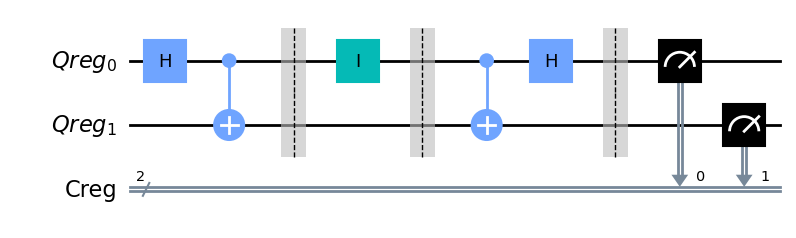

{'00': 1}


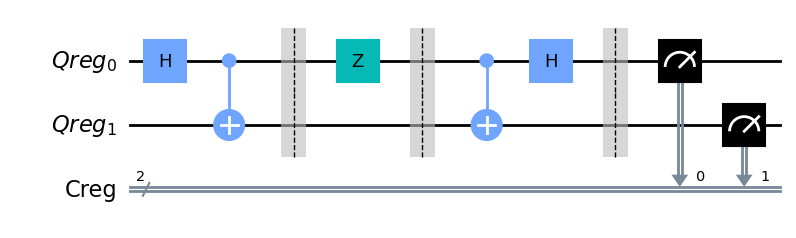

{'01': 1}


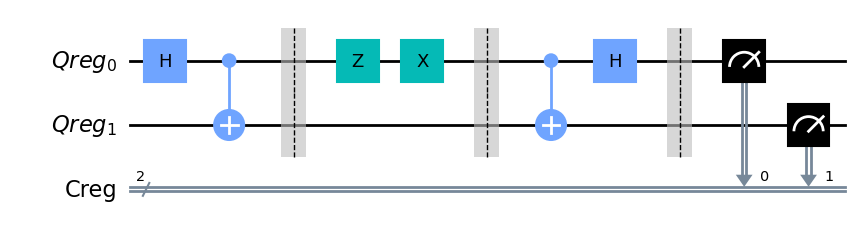

{'11': 1}


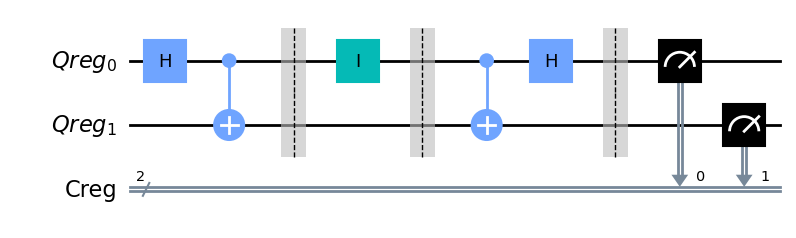

{'00': 1}


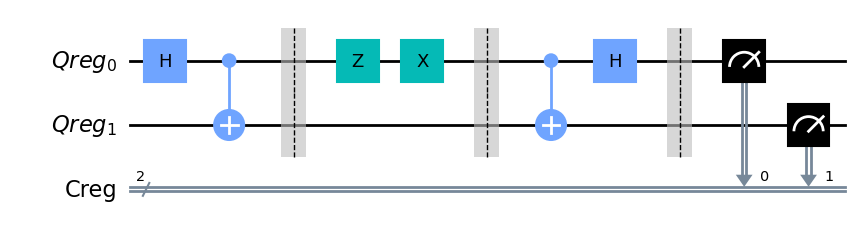

{'11': 1}


In [94]:

for message in messagelist:
    from qiskit import *
    import numpy as np

    Q=QuantumRegister(2,"Qreg")
    C=ClassicalRegister(2,"Creg")

    qc=QuantumCircuit(Q,C)


    qc.h(0)
    qc.cx(0,1)

    qc.barrier()

#     alice encoding

    if message=='00':
        qc.i(0)
    elif message=='01':
        qc.z(0)
    elif message=='10':
        qc.x(0)
    elif message=='11':
        qc.z(0)
        qc.x(0)

    qc.barrier()

#bob decoding
    qc.cx(0,1)
    qc.h(0)

    qc.barrier()
    qc.measure(Q,C)
    display(qc.draw(output="mpl"))
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)

    print(counts)